    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

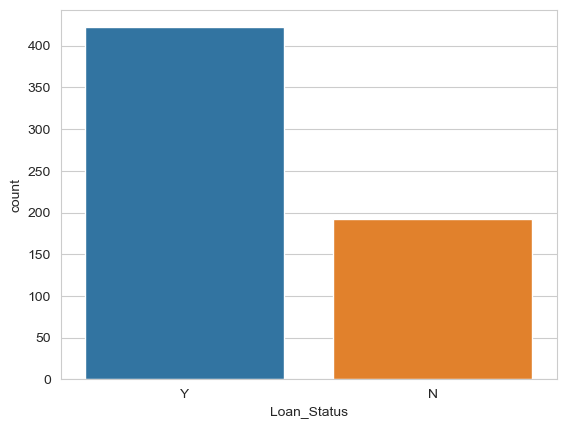

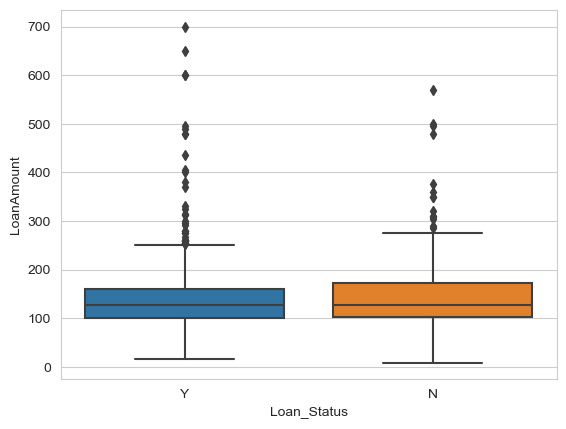

Train Accuracy: 1.0
Test Accuracy: 0.7560975609756098


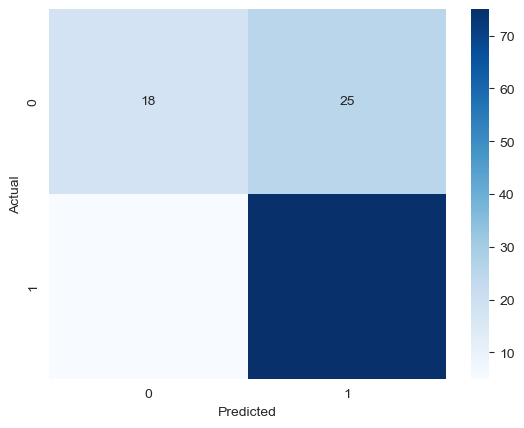

Processed data exported to 'processed_loan_data.csv'.
Dasboard of the given test result for better understanding


C:\Users\aryan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


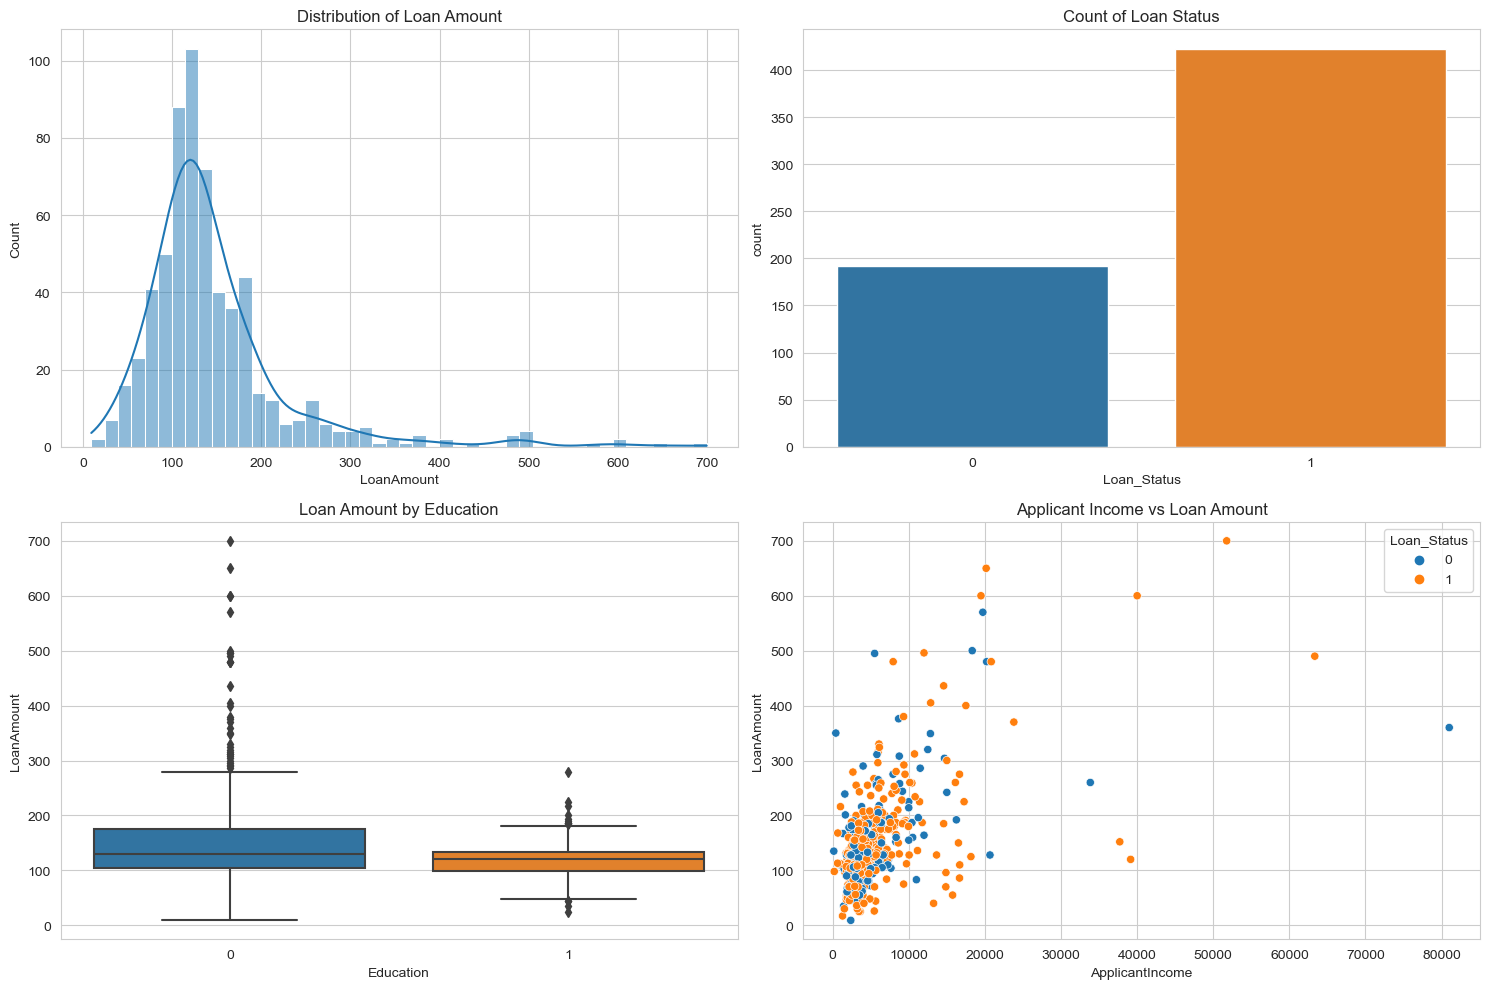

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

file_path = 'loan-predictionUC.csv.xlsx - loan-predictionUC.csv.csv'  # Replace with the actual path to your dataset
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe())

#Here we are dealing with missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Data visualization
sns.countplot(x='Loan_Status', data=df)
plt.show()
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.show()

# Divide the dataset into training and test datasets

le = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[column] = le.fit_transform(df[column])

# Handling the '3+' in 'Dependents' column
df['Dependents'] = df['Dependents'].str.replace('+', '')
df['Dependents'] = df['Dependents'].astype(float)

# Drop the 'Loan_ID' column as it's not relevant for prediction
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the machine learning model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#Testing the model and finding the accuracy
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

#To create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Exporting the processed data to a CSV file to create tableau dasboard
df.to_csv('processed_loan_data.csv', index=False)
print("Processed data exported to 'processed_loan_data.csv'.")

print("Dasboard of the given test result for better understanding")


#DIsplaying all the data outcomes after analyzing
# Load the Excel file
file_path = 'processed_loan_data.xlsx'
df = pd.read_excel(file_path)


# Display the first few rows of the dataframe
df.head()

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Distribution of Loan Amount
sns.histplot(df['LoanAmount'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Loan Amount')

# Plot 2: Count of Loan Status
sns.countplot(x='Loan_Status', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Count of Loan Status')

# Plot 3: Boxplot of Loan Amount by Education
sns.boxplot(x='Education', y='LoanAmount', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Loan Amount by Education')

# Plot 4: Scatterplot of ApplicantIncome vs LoanAmount
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Applicant Income vs Loan Amount')


plt.tight_layout()
plt.show()

